# Box Office (1999-2019) Data Visualization

In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## Data Frame

In [2]:
# Filepath
filepath = "random_v3_df.csv"

# Read the CSV file, converting relevant columns to correct data types
df = pd.read_csv(filepath)
df.shape

(2276, 10)

In [3]:
df.head()

,title_without_year,year,main_genre,MPAA-Rating,Runtime,Distributor,Budget_$,Domestic_$,International_$,total_revenue_$
0,Avengers: Endgame,2019,Action,PG-13,181,Walt Disney Studios Motion Pictures,"$356,000,000","$858,373,000","$1,939,128,328","$2,797,501,328"
1,Avatar,2009,Sci-Fi,PG-13,162,Twentieth Century Fox,"$237,000,000","$749,766,139","$1,993,811,448","$2,743,577,587"
2,Star Wars: Episode VII - The Force Awakens,2015,Sci-Fi,PG-13,138,Walt Disney Studios Motion Pictures,"$245,000,000","$936,662,225","$1,131,561,399","$2,068,223,624"
3,Jurassic World,2015,Adventure,PG-13,124,Universal Pictures,"$150,000,000","$652,270,625","$1,018,130,012","$1,670,400,637"
4,The Lion King,2019,Family,PG,118,Walt Disney Studios Motion Pictures,"$260,000,000","$543,638,043","$1,113,305,351","$1,656,943,394"


In [4]:
df["main_genre"].value_counts()

main_genre
Comedy         385
Drama          374
Thriller       223
Action         207
Romance        156
Adventure      155
Sci-Fi         111
Crime          103
Fantasy         99
Family          84
Horror          82
Mystery         74
Biography       51
Animation       37
Music           31
History         25
War             22
Sport           21
Western         13
Musical         12
Documentary     11
Name: count, dtype: int64

In [5]:
# Create Profit Column
# Convert `Budget_$` and `total_revenue_$` columns to numeric, after removing '$' and ','
df['Budget_$'] = df['Budget_$'].astype(str).str.replace(r'[$,]', '', regex=True)
df['total_revenue_$'] = df['total_revenue_$'].astype(str).str.replace(r'[$,]', '', regex=True)
df['Budget_$'] = pd.to_numeric(df['Budget_$'])
df['total_revenue_$'] = pd.to_numeric(df['total_revenue_$'])

# Calculate Profit
df['profit'] = df['total_revenue_$'] - df['Budget_$']

## Regression Model: All Genres

In [6]:
# Define linear regression model
def create_linear_regression_plot(df, x_col, y_col, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])

    # Find movie with highest and lowest profit
    highest_profit_movie_index = df[y_col].idxmax()
    highest_profit_movie = df.loc[highest_profit_movie_index, 'title_without_year']
    highest_profit_year = df.loc[highest_profit_movie_index, 'year']
    highest_profit = df[y_col].max() / 1_000_000_000

    filtered_df = df[df['title_without_year'] != highest_profit_movie]
    lowest_profit_movie_index = filtered_df[y_col].idxmin()
    lowest_profit_movie = filtered_df.loc[lowest_profit_movie_index, 'title_without_year']
    lowest_profit_year = filtered_df.loc[lowest_profit_movie_index, 'year']
    lowest_profit = filtered_df[y_col].min() / 1_000_000

    # Create scatter plot, keeping x-values in millions and converting y-values to billions
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_col] / 1_000_000, df[y_col] / 1_000_000_000, s=100, color='#277DA1', label='Data Points', edgecolors='black', linewidths=0.5)

    # Add linear regression line
    plt.plot(df[x_col] / 1_000_000, (slope * df[x_col] + intercept) / 1_000_000_000, color='#F94144', label='Linear Regression', linewidth=3)

    # Equation annotation
    plt.annotate(f'y = {slope:.2f}x + {intercept / 1_000:.2f}',
                 xy=(df[x_col].min() / 1_000_000, df[y_col].max() / 1_000_000_000),
                 xytext=(20, -20),
                 textcoords='offset points',
                 color='#F94144',
                 fontsize=18,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.7))

    # Labels and title
    plt.xlabel(f'{x_label} (Millions)', fontsize=16)
    plt.ylabel(f'{y_label} (Billions)', fontsize=16)
    plt.title(title, fontsize=18)

    # Add gridlines
    plt.grid(axis='both', linestyle='--')

    # Display r-squared value
    print(f"The r-squared is: {r_value**2}")

    # Print highest and lowest profit movies
    print("\nHighest Profit:")
    print(f"- Title: {highest_profit_movie}({highest_profit_year})")
    highest_profit_budget = df.loc[highest_profit_movie_index, 'Budget_$'] / 1_000_000
    print(f"- Budget: ${highest_profit_budget:.2f} Million")

    highest_profit_revenue = df.loc[highest_profit_movie_index, 'total_revenue_$']

    # Format revenue dynamically
    if highest_profit_revenue >= 1_000_000_000:  # Check if over 1 billion
        highest_profit_revenue /= 1_000_000_000
        print(f"- Revenue: ${highest_profit_revenue:.2f} Billion")
    else:
        highest_profit_revenue /= 1_000_000
        print(f"- Revenue: ${highest_profit_revenue:.2f} Million")

    if highest_profit >= 1:
        print(f"- Profit: ${highest_profit:.2f} Billion")
    else:
        highest_profit_millions = highest_profit * 1000
        print(f"- Profit: ${highest_profit_millions:.2f} Million")


    print("\nBiggest Flop:")
    print(f"- Title: {lowest_profit_movie}({lowest_profit_year})")
    lowest_profit_budget = df.loc[lowest_profit_movie_index, 'Budget_$'] / 1_000_000
    print(f"- Budget: ${lowest_profit_budget:.2f} Million")

    lowest_profit_revenue = df.loc[lowest_profit_movie_index, 'total_revenue_$']

    # Format revenue dynamically
    if lowest_profit_revenue >= 1_000_000_000:
        lowest_profit_revenue /= 1_000_000_000
        print(f"- Revenue: ${lowest_profit_revenue:.2f} Billion")
    else:
        lowest_profit_revenue /= 1_000_000
        print(f"- Revenue: ${lowest_profit_revenue:.2f} Million")

    print(f"- Loss: ${-lowest_profit:.2f} Million")

    # Show plot
    plt.show()

The r-squared is: 0.3448866008133383

Highest Profit:
- Title: Avatar (2009)
- Budget: $237.00 Million
- Revenue: $2.74 Billion
- Profit: $2.51 Billion

Biggest Flop:
- Title: The Polar Express (2005)
- Budget: $165.00 Million
- Revenue: $11.91 Million
- Loss: $153.09 Million


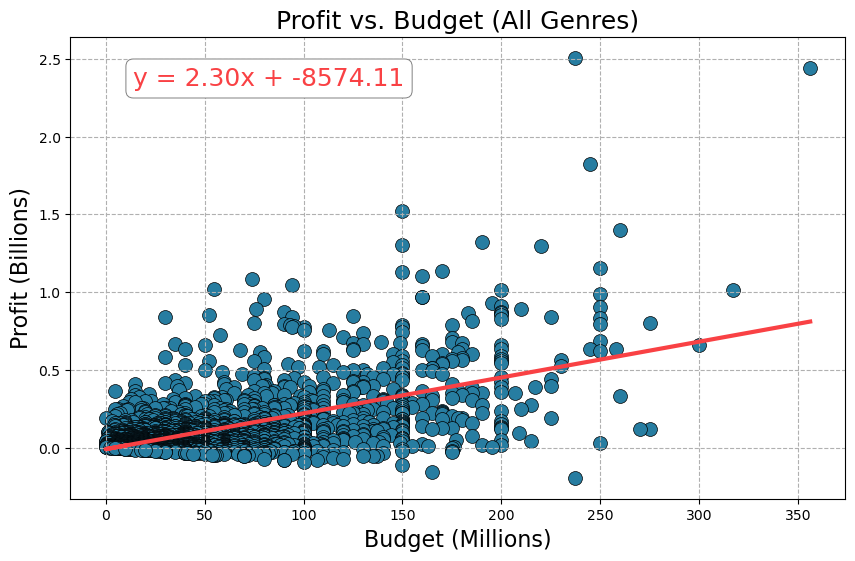

In [7]:
# Call the function
create_linear_regression_plot(df, 'Budget_$', 'profit', 'Budget', 'Profit', 'Profit vs. Budget (All Genres)')

##### Analysis: When we analyze every movie across the board, the data shows us that a movie's budget is approximately 35% the reason behind its success.

## Regression Models: Individual Genres

In [8]:
def create_linear_regression_plot_genre(df, x_col, y_col, x_label, y_label, title, genre_filter): 
    # Filter for the specified genre from 'main_genre' column
    genre_df = df[df['main_genre'] == genre_filter]

    # Perform linear regression on the filtered data
    slope, intercept, r_value, p_value, std_err = linregress(genre_df[x_col], genre_df[y_col])

    # Find movie with highest and lowest profit
    highest_profit_movie_index = genre_df[y_col].idxmax()
    highest_profit_movie = genre_df.loc[highest_profit_movie_index, 'title_without_year']
    highest_profit_year = genre_df.loc[highest_profit_movie_index, 'year']
    highest_profit = genre_df[y_col].max() / 1_000_000_000

    filtered_df = genre_df[genre_df['title_without_year'] != highest_profit_movie]
    lowest_profit_movie_index = filtered_df[y_col].idxmin()
    lowest_profit_movie = filtered_df.loc[lowest_profit_movie_index, 'title_without_year']
    lowest_profit_year = filtered_df.loc[lowest_profit_movie_index, 'year']
    lowest_profit = filtered_df[y_col].min() / 1_000_000

    # Create scatter plot, keeping x-values in millions and converting y-values to billions
    plt.figure(figsize=(10, 6))
    plt.scatter(genre_df[x_col] / 1_000_000, genre_df[y_col] / 1_000_000_000, s=100, color='#277DA1', label='Data Points', edgecolors='black', linewidths=0.5)

    # Add linear regression line
    plt.plot(genre_df[x_col] / 1_000_000, (slope * genre_df[x_col] + intercept) / 1_000_000_000, color='#F94144', label='Linear Regression', linewidth=3)

    # Equation annotation
    plt.annotate(f'y = {slope:.2f}x + {intercept / 1_000:.2f}',
                 xy=(genre_df[x_col].min() / 1_000_000, genre_df[y_col].max() / 1_000_000_000),
                 xytext=(20, -20),
                 textcoords='offset points',
                 color='#F94144',
                 fontsize=18,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.7))

    # Labels and title
    plt.xlabel(f'{x_label} (Millions)', fontsize=16)
    plt.ylabel(f'{y_label} (Billions)', fontsize=16)
    plt.title(f'{title} ({genre_filter})', fontsize=18)  # Dynamically include genre_filter in title

    # Add gridlines
    plt.grid(axis='both', linestyle='--')

    # Display r-squared value
    print(f"The r-squared is: {r_value**2}")

    # Print highest and lowest profit movies
    print("\nHighest Profit:")
    print(f"- Title: {highest_profit_movie}({highest_profit_year})")
    highest_profit_budget = df.loc[highest_profit_movie_index, 'Budget_$'] / 1_000_000
    print(f"- Budget: ${highest_profit_budget:.2f} Million")

    highest_profit_revenue = df.loc[highest_profit_movie_index, 'total_revenue_$']

    # Format revenue dynamically
    if highest_profit_revenue >= 1_000_000_000:  # Check if over 1 billion
        highest_profit_revenue /= 1_000_000_000
        print(f"- Revenue: ${highest_profit_revenue:.2f} Billion")
    else:
        highest_profit_revenue /= 1_000_000
        print(f"- Revenue: ${highest_profit_revenue:.2f} Million")

    if highest_profit >= 1:
        print(f"- Profit: ${highest_profit:.2f} Billion")
    else:
        highest_profit_millions = highest_profit * 1000
        print(f"- Profit: ${highest_profit_millions:.2f} Million")


    print("\nBiggest Flop:")
    print(f"- Title: {lowest_profit_movie}({lowest_profit_year})")
    lowest_profit_budget = df.loc[lowest_profit_movie_index, 'Budget_$'] / 1_000_000
    print(f"- Budget: ${lowest_profit_budget:.2f} Million")

    lowest_profit_revenue = df.loc[lowest_profit_movie_index, 'total_revenue_$']

    # Format revenue dynamically
    if lowest_profit_revenue >= 1_000_000_000:
        lowest_profit_revenue /= 1_000_000_000
        print(f"- Revenue: ${lowest_profit_revenue:.2f} Billion")
    else:
        lowest_profit_revenue /= 1_000_000
        print(f"- Revenue: ${lowest_profit_revenue:.2f} Million")

    print(f"- Loss: ${-lowest_profit:.2f} Million")

    # Show plot
    plt.show()

### Action

The r-squared is: 0.49024371214819723

Highest Profit:
- Title: Avengers: Endgame (2019)
- Budget: $356.00 Million
- Revenue: $2.80 Billion
- Profit: $2.44 Billion

Biggest Flop:
- Title: The Last Castle (2001)
- Budget: $72.00 Million
- Revenue: $27.64 Million
- Loss: $44.36 Million


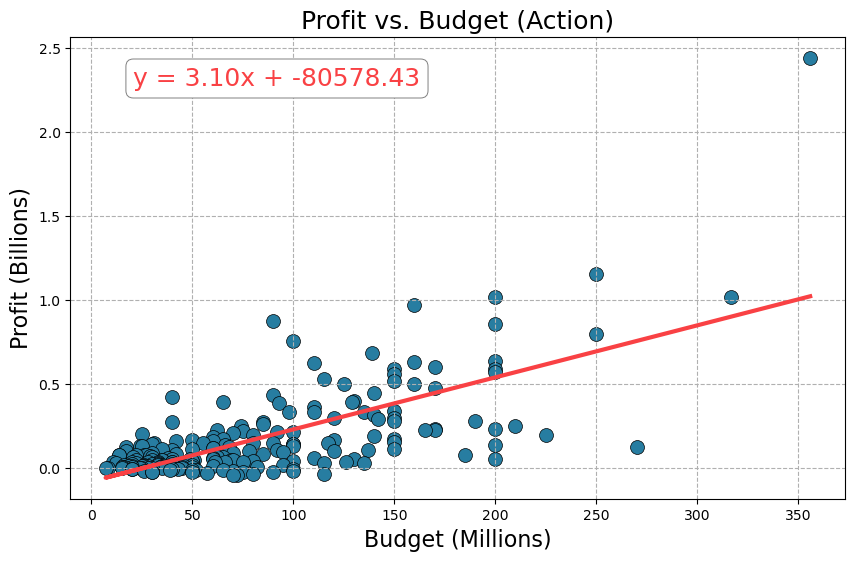

In [9]:
# Call the function with the desired genre
create_linear_regression_plot_genre(df, 'Budget_$', 'profit', 'Budget', 'Profit', 'Profit vs. Budget', 'Action')

##### Analysis: Action movies have whopping 0.49 r-squared value meaning that an action movie's success is highly dependant on its budget.

### Drama

The r-squared is: 0.1536530870897737

Highest Profit:
- Title: The Lord of the Rings: The Return of the King (2003)
- Budget: $94.00 Million
- Revenue: $1.14 Billion
- Profit: $1.05 Billion

Biggest Flop:
- Title: The Promise (2017)
- Budget: $90.00 Million
- Revenue: $12.45 Million
- Loss: $77.55 Million


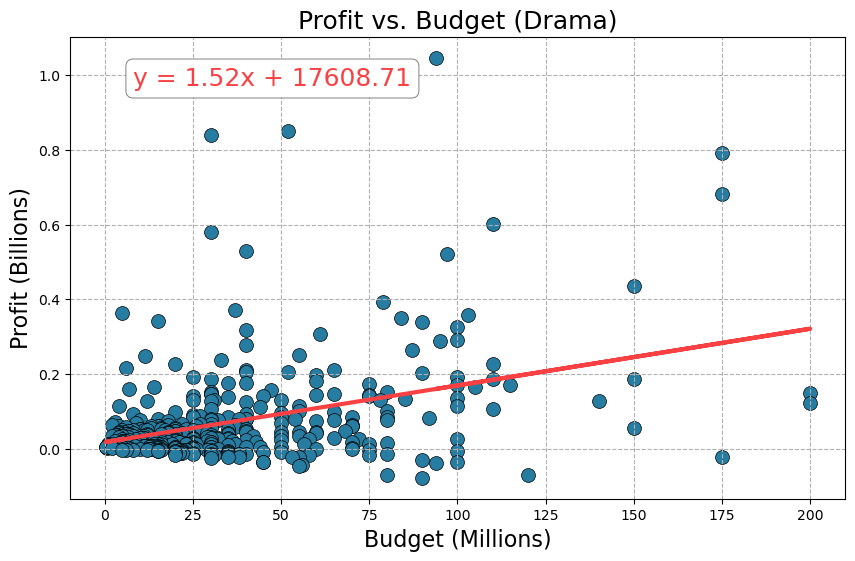

In [10]:
create_linear_regression_plot_genre(df, 'Budget_$', 'profit', 'Budget', 'Profit', 'Profit vs. Budget', 'Drama')

##### Analysis: A dramatic movie's success seems to be less dependant on its budget as its r-squared value is only 0.15.

### Comedy

The r-squared is: 0.24981478020975345

Highest Profit:
- Title: Despicable Me 3 (2017)
- Budget: $80.00 Million
- Revenue: $1.03 Billion
- Profit: $954.80 Million

Biggest Flop:
- Title: The Adventures of Pluto Nash (2002)
- Budget: $100.00 Million
- Revenue: $7.10 Million
- Loss: $92.90 Million


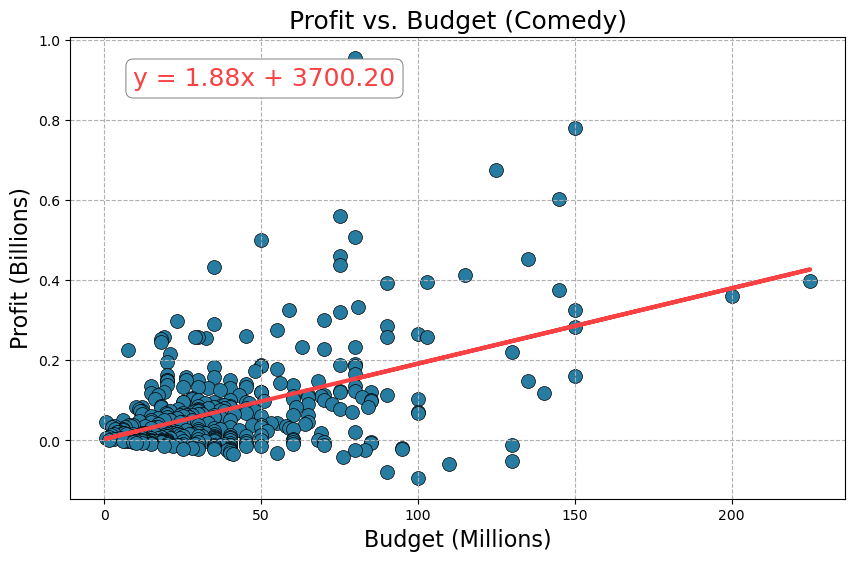

In [11]:
create_linear_regression_plot_genre(df, 'Budget_$', 'profit', 'Budget', 'Profit', 'Profit vs. Budget', 'Comedy')

##### Analysis: Comedies are moderately higher than dramas, but other major factors are still at play for their success.

### Romance

The r-squared is: 0.24690718699610936

Highest Profit:
- Title: The Twilight Saga: Breaking Dawn - Part 2 (2012)
- Budget: $120.00 Million
- Revenue: $829.75 Million
- Profit: $709.75 Million

Biggest Flop:
- Title: Gigli (2003)
- Budget: $54.00 Million
- Revenue: $7.27 Million
- Loss: $46.73 Million


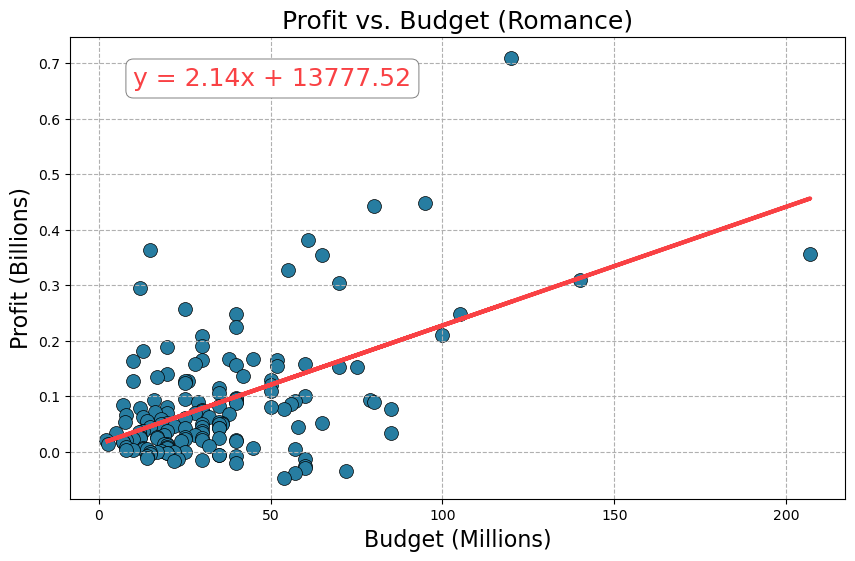

In [12]:
create_linear_regression_plot_genre(df, 'Budget_$', 'profit', 'Budget', 'Profit', 'Profit vs. Budget', 'Romance')

##### Analysis: Romantic movies are about the same as comedies.

### Sci-Fi

The r-squared is: 0.3277254556220426

Highest Profit:
- Title: Avatar (2009)
- Budget: $237.00 Million
- Revenue: $2.74 Billion
- Profit: $2.51 Billion

Biggest Flop:
- Title: Stealth (2005)
- Budget: $135.00 Million
- Revenue: $79.27 Million
- Loss: $55.73 Million


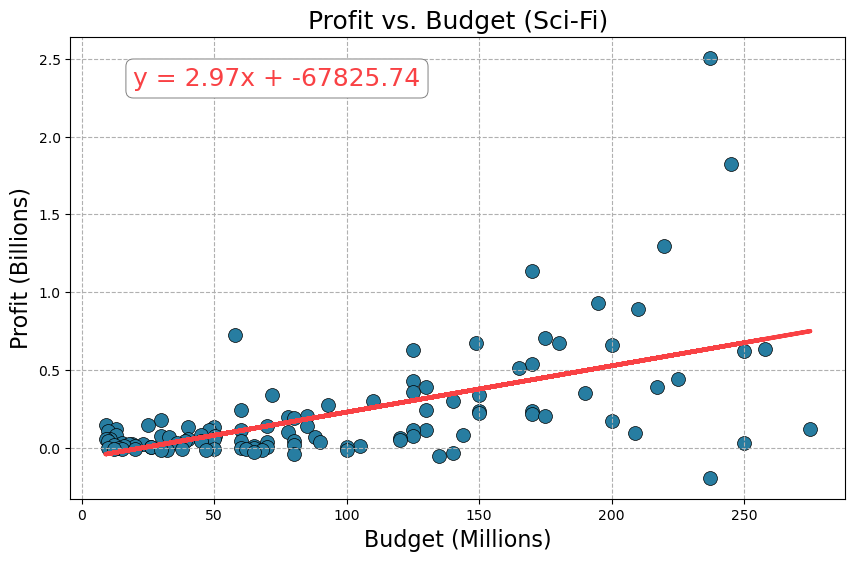

In [13]:
create_linear_regression_plot_genre(df, 'Budget_$', 'profit', 'Budget', 'Profit', 'Profit vs. Budget', 'Sci-Fi')

##### Analysis: Sci-Fi movies have a higher r-squared value which is to be expected, but it still seems like it's not the most important factor in its success.

### Sport

The r-squared is: 0.0003058958736150328

Highest Profit:
- Title: The Blind Side (2009)
- Budget: $29.00 Million
- Revenue: $309.21 Million
- Profit: $280.21 Million

Biggest Flop:
- Title: The Legend of Bagger Vance (2000)
- Budget: $80.00 Million
- Revenue: $39.46 Million
- Loss: $40.54 Million


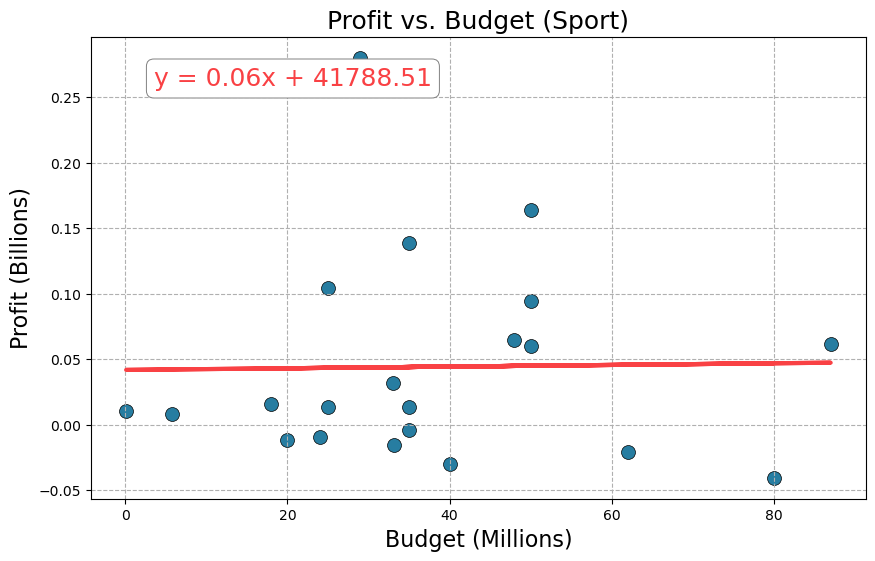

In [14]:
create_linear_regression_plot_genre(df, 'Budget_$', 'profit', 'Budget', 'Profit', 'Profit vs. Budget', 'Sport')

##### Analysis: Movies about sports are a considerably smaller sample size, but there appears to be no correlation at all between a sports movie's budget and its box office success.

### Documentary

The r-squared is: 0.0525869512860423

Highest Profit:
- Title: Jackass: The Movie (2002)
- Budget: $5.00 Million
- Revenue: $79.49 Million
- Profit: $74.49 Million

Biggest Flop:
- Title: Capitalism: A Love Story (2009)
- Budget: $20.00 Million
- Revenue: $17.44 Million
- Loss: $2.56 Million


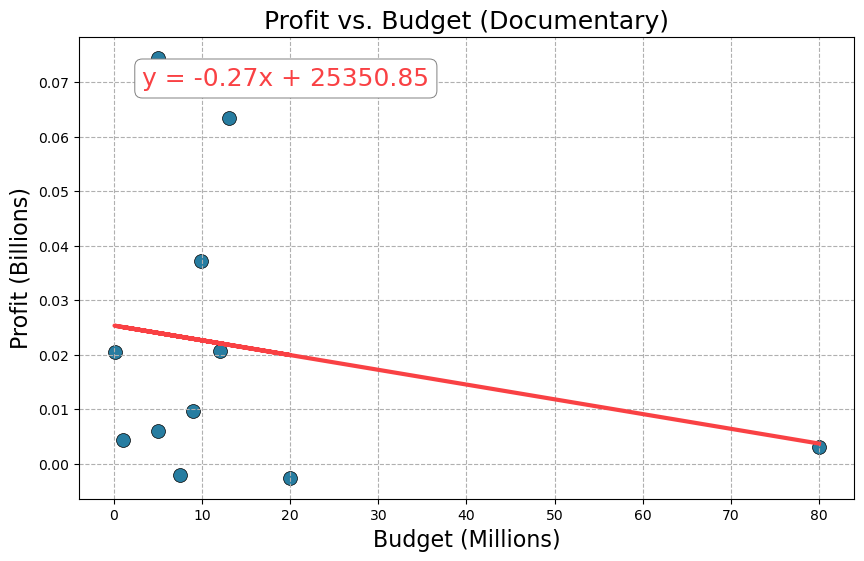

In [15]:
create_linear_regression_plot_genre(df, 'Budget_$', 'profit', 'Budget', 'Profit', 'Profit vs. Budget', 'Documentary')

##### Analysis: A documentary's budget only accounts for about 5% of its success. 